# Clustering 

#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


###### Crime dataset 

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [10]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
df.shape


(50, 5)

In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [13]:
# drop Unnamed : 0 columns is not nessasery 
df1=df.drop(["Unnamed: 0"],axis=1)
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [14]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [15]:
# standarddized data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df1)
df_scaler=scaler.transform(df1)
df_scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

#### hierarchical clustering 

In [16]:
# create dendogram 
from scipy.cluster.hierarchy import linkage 
import  scipy.cluster.hierarchy as sch 

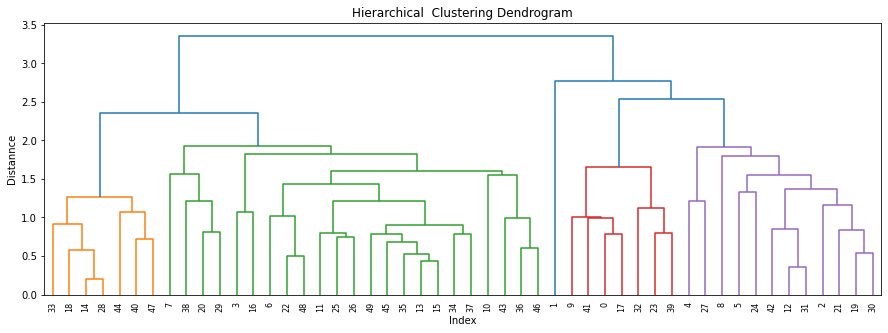

In [17]:
z=linkage(df_scaler,method="average",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title("Hierarchical  Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distannce")
sch.dendrogram(z,)
plt.show()

In [18]:
#cut the dendrogram 
from sklearn.cluster import AgglomerativeClustering 
complete = AgglomerativeClustering (n_clusters=5,linkage="complete",
                                   affinity="euclidean").fit(df_scaler)
complete1=pd.Series(complete.labels_)
complete1
df["clust"]=complete1
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [19]:
# maen of the all 
df.iloc[:,1:].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.871429,134.476190,70.761905,18.580952,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,11.054545,264.090909,79.090909,32.618182,2.0
3,3.180000,78.700000,49.300000,11.630000,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [20]:
df[(df.clust==1)]


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [21]:
df[(df.clust==2)]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2


In [22]:
df[(df.clust==4)]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,4


##### k-means clustering 

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\91901\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


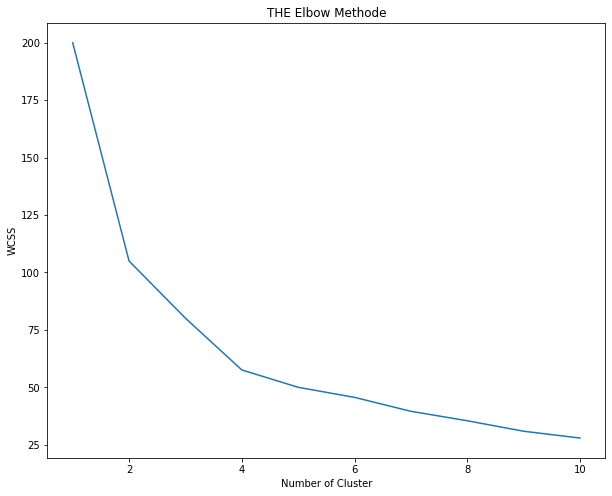

In [28]:
fig=plt.figure(figsize=(10,8))
WCSS=[]

for i in range (1,11):
    cif=KMeans(n_clusters=i)
    cif.fit(df_scaler)
    WCSS.append(cif.inertia_)

plt.plot(range(1,11),WCSS)

plt.title("THE Elbow Methode")
plt.ylabel("WCSS")
plt.xlabel("Number of Cluster")
plt.show()

In [29]:
cif=KMeans(n_clusters=5)
cif2=cif.fit_predict(df_scaler)

In [30]:
cif2

array([4, 1, 1, 0, 1, 1, 3, 0, 1, 4, 3, 2, 1, 0, 2, 0, 0, 4, 2, 1, 3, 1,
       2, 4, 0, 2, 2, 1, 2, 3, 1, 1, 4, 2, 3, 0, 0, 3, 3, 4, 2, 4, 1, 3,
       2, 0, 3, 2, 2, 0])

In [31]:
cif.labels_

array([4, 1, 1, 0, 1, 1, 3, 0, 1, 4, 3, 2, 1, 0, 2, 0, 0, 4, 2, 1, 3, 1,
       2, 4, 0, 2, 2, 1, 2, 3, 1, 1, 4, 2, 3, 0, 0, 3, 3, 4, 2, 4, 1, 3,
       2, 0, 3, 2, 2, 0])

In [32]:
cif.cluster_centers_

array([[-0.1039025 , -0.16678773, -0.15632323, -0.08541618],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ]])

In [33]:
cif.inertia_

50.07656289493946

In [35]:
md=pd.Series(cif2)
md

0     4
1     1
2     1
3     0
4     1
5     1
6     3
7     0
8     1
9     4
10    3
11    2
12    1
13    0
14    2
15    0
16    0
17    4
18    2
19    1
20    3
21    1
22    2
23    4
24    0
25    2
26    2
27    1
28    2
29    3
30    1
31    1
32    4
33    2
34    3
35    0
36    0
37    3
38    3
39    4
40    2
41    4
42    1
43    3
44    2
45    0
46    3
47    2
48    2
49    0
dtype: int32

In [37]:
df["kclust"]=md
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,kclust
0,Alabama,13.2,236,58,21.2,1,4
1,Alaska,10.0,263,48,44.5,4,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,2,1
5,Colorado,7.9,204,78,38.7,2,1
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,1,4


In [38]:
df.iloc[:,1:].groupby(df.kclust).mean()

,Murder,Assault,UrbanPop,Rape,clust,kclust
kclust,,,,,,
0,7.340000,157.000000,63.300000,20.440000,0.000000,0.0
1,10.966667,264.000000,76.500000,33.608333,2.166667,1.0
2,3.091667,76.000000,52.083333,11.833333,2.500000,2.0
3,4.955556,125.444444,80.111111,17.788889,0.000000,3.0
4,14.671429,251.285714,54.285714,21.685714,1.000000,4.0


In [50]:
>>> plt.style.use(['classic']) 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

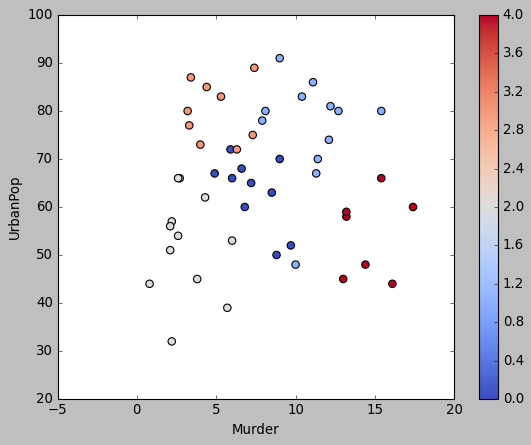

In [40]:
df.plot(x="Murder",y="UrbanPop",c=cif.labels_,kind="scatter",s=45,cmap=plt.cm.coolwarm)

##### Dbscan Clustering

In [42]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.45,min_samples=5).fit(df_scaler)

In [43]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [44]:
c=pd.DataFrame(dbscan.labels_,columns=["dbcsan_clust"])
c

,dbcsan_clust
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [46]:
df1=pd.concat([df,c],axis=1)
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,kclust,dbcsan_clust
0,Alabama,13.2,236,58,21.2,1,4,-1
1,Alaska,10.0,263,48,44.5,4,1,-1
2,Arizona,8.1,294,80,31.0,2,1,-1
3,Arkansas,8.8,190,50,19.5,0,0,-1
4,California,9.0,276,91,40.6,2,1,-1
5,Colorado,7.9,204,78,38.7,2,1,-1
6,Connecticut,3.3,110,77,11.1,0,3,-1
7,Delaware,5.9,238,72,15.8,0,0,-1
8,Florida,15.4,335,80,31.9,2,1,-1
9,Georgia,17.4,211,60,25.8,1,4,-1


<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

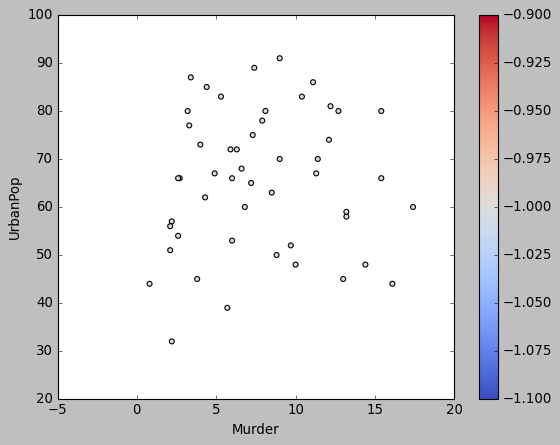

In [48]:
import matplotlib.pyplot as plt 
>>> plt.style.use("classic")
df1.plot(x="Murder",y="UrbanPop",c=dbscan.labels_,kind="scatter",cmap=plt.cm.coolwarm)

### Airlines data set 

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [150]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [153]:
data.rename(columns={"Award?":"Award"},inplace=True)


In [154]:
data


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [155]:
data=data.drop(["ID#"],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [138]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [140]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [156]:
pd.DataFrame(normalize(data),columns=data.columns)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [157]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaler= scaler.fit_transform(data)
df_scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

##### Hieararchical clustering 

In [163]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

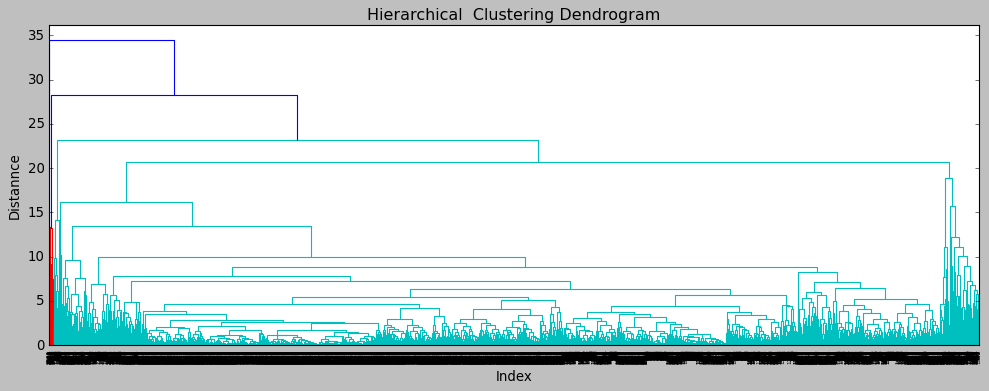

In [164]:
z=linkage(df_scaler,method="complete",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title("Hierarchical  Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distannce")
sch.dendrogram(z,)
plt.show()



In [175]:
#cut the dendrogram 
from sklearn.cluster import AgglomerativeClustering 
complete = AgglomerativeClustering (n_clusters=5,linkage="ward",
                                   affinity="euclidean").fit(df_scaler)
complete1=pd.Series(complete.labels_)
complete1
data["clust"]=complete1
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [177]:
data["clust"].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clust, dtype: int64

In [178]:
data.iloc[:,1:].groupby(data.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
clust,,,,,,,,,,,
0,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198,0.0
1,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,1.0
2,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,2.0
3,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.0
4,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,4.0


In [180]:
data[(data.clust==1)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [182]:
data[(data.clust==4)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
343,112501,0,1,1,2,19140,11,0,0,7101,0,4
384,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,15835,0,2,1,5,112171,16,0,0,5825,1,4
1036,154664,0,4,1,3,73881,33,0,0,5769,0,4
1244,166465,0,4,1,4,98717,30,0,0,5531,0,4
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,4


##### KMeans Clustering 

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

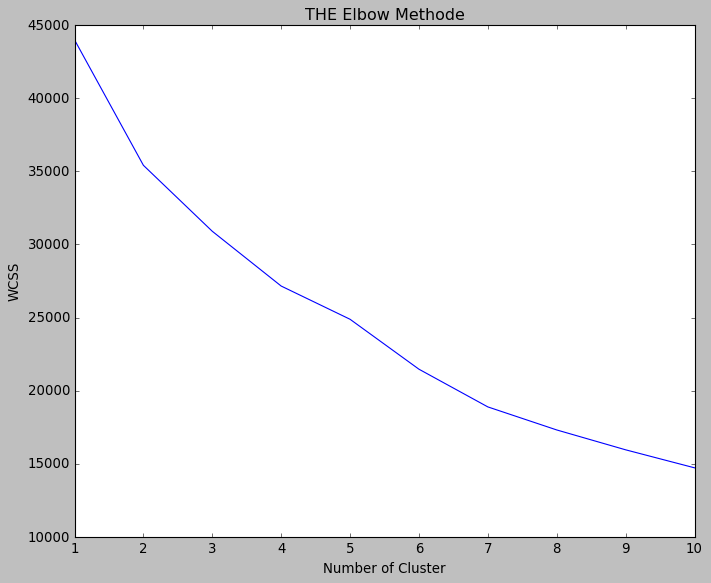

In [187]:
fig=plt.figure(figsize=(10,8))
WCSS=[]
for i in range (1,11):
    cif=KMeans(n_clusters=i)
    cif.fit(df_scaler)
    WCSS.append(cif.inertia_)

plt.plot(range(1,11),WCSS)
plt.title("THE Elbow Methode")
plt.ylabel("WCSS")
plt.xlabel("Number of Cluster")
plt.show()

In [189]:
cif=KMeans(n_clusters=5)
cif

KMeans(n_clusters=5)

In [191]:
cif2=cif.fit_predict(df_scaler)
cif2

array([0, 0, 0, ..., 1, 0, 0])

In [192]:
cif.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [193]:
cif.cluster_centers_

array([[-0.29272085, -0.05903967, -0.60393487, -0.09824189, -0.06073141,
        -0.51819639, -0.4973148 , -0.1852947 , -0.19791439, -0.20486046,
        -0.35061268],
       [ 0.42976221,  0.0177552 ,  1.19809629, -0.09824189, -0.05468689,
         0.91902356,  0.74767648, -0.07927799, -0.09080965,  0.37073649,
         0.57879842],
       [ 1.18115618,  0.85944791,  0.09179794, -0.09824189, -0.06276658,
         0.61317096,  1.61154347,  3.606713  ,  3.86491554,  0.2888319 ,
         0.90568019],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388]])

In [194]:
cif.inertia_

23700.435800408497

In [195]:
md=pd.Series(cif2)
md

0       0
1       0
2       0
3       0
4       1
       ..
3994    0
3995    0
3996    1
3997    0
3998    0
Length: 3999, dtype: int32

In [198]:
data["kclust"]=md
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,kclust
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [199]:
data.kclust.value_counts()

0    2517
1    1268
2     156
4      43
3      15
Name: kclust, dtype: int64

In [200]:
data.iloc[:,1:].groupby(data.kclust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,kclust
kclust,,,,,,,,,,,,
0,98.443385,1.228049,1.000000,1.000397,4631.466826,6.826381,200.636869,0.622964,3695.547874,0.201033,0.942789,0.0
1,157.849369,3.708991,1.000000,1.001577,39337.379338,18.781546,349.063880,1.029180,4884.084385,0.649842,0.077287,1.0
2,808.955128,2.185897,1.000000,1.000000,31951.666667,27.076923,5509.576923,16.032051,4714.961538,0.807692,1.583333,2.0
3,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.000000,3.0
4,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.000000,4.0


In [201]:
>>> plt.style.use(["classic"])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Qual_miles', ylabel='Bonus_miles'>

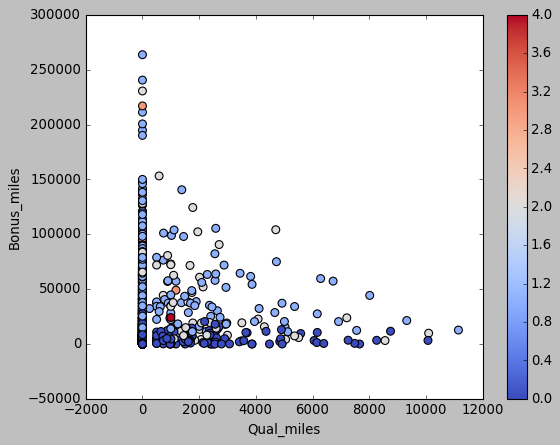

In [213]:
data1.plot(x="Qual_miles",y="Bonus_miles",c=cif.labels_,s=50,kind="scatter",cmap=plt.cm.coolwarm)

##### Dbscan Clustering

In [203]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.45,min_samples=5).fit(df_scaler)

In [204]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [205]:
c=pd.DataFrame(dbscan.labels_,columns=["dbscan_clust"])
c

,dbscan_clust
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,-1
3997,0


In [206]:
data1=pd.concat([data,c],axis=1)

In [207]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,kclust,dbscan_clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


<AxesSubplot:xlabel='Qual_miles', ylabel='Bonus_miles'>

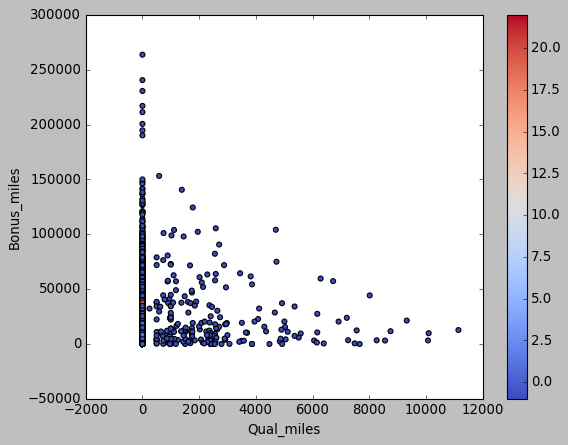

In [211]:
data1.plot(x="Qual_miles",y="Bonus_miles",c=dbscan.labels_,kind="scatter",cmap=plt.cm.coolwarm)